# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [20]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [21]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
countries = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=20)
lngs = np.random.uniform(low=-180.000, high=180.000, size=20)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    country = citipy.nearest_city(lat_lng[0], lat_lng[1]).country_code
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        countries.append(country.upper())

# Print the city count to confirm sufficient count
len(cities)

20

In [22]:
cities

['taloqan',
 'butaritari',
 'barentsburg',
 'teguldet',
 'karasjok',
 'ushuaia',
 'umm lajj',
 'cabedelo',
 'mazagao',
 'tasiilaq',
 'chernyakhovsk',
 'maragogi',
 'hilo',
 'vaini',
 'barrow',
 'mar del plata',
 'sao jose da coroa grande',
 'albany',
 'kavieng',
 'cidreira']

In [23]:
weather_df = pd.DataFrame({"City":cities, "Cloudiness":'', "Country":countries, "Date":'', "Humidity":'',
                           "Lat":'', "Lng":'', "Max Temp":'', "Wind Speed":''})
weather_df.head(10)

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,taloqan,,AF,,,,,,
1,butaritari,,KI,,,,,,
2,barentsburg,,SJ,,,,,,
3,teguldet,,RU,,,,,,
4,karasjok,,NO,,,,,,
5,ushuaia,,AR,,,,,,
6,umm lajj,,SA,,,,,,
7,cabedelo,,BR,,,,,,
8,mazagao,,BR,,,,,,
9,tasiilaq,,GL,,,,,,


In [24]:
url = 'http://api.openweathermap.org/data/2.5/weather?units=imperial&q='
count = 1
count_set = 1

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [25]:
 print("Begining Data Retrieval \n-----------------------")
    
for index, row in weather_df.iterrows():
    
    query_url = url + row["City"] + ',' + row["Country"] + "&appid=" + weather_api_key 
    
    response = requests.get(query_url)
    response_json = response.json()
    
    try:
        print(f'Processing Record {count} of Set {count_set} | {response_json["name"]}')
        
        weather_df.loc[index, "Cloudiness"] = response_json["clouds"]["all"]
        weather_df.loc[index, "Date"] = response_json["dt"]
        weather_df.loc[index, "Humidity"] = response_json["main"]["humidity"]
        weather_df.loc[index, "Lat"] = response_json["coord"]["lat"]
        weather_df.loc[index, "Lng"] = response_json["coord"]["lon"]
        weather_df.loc[index, "Max Temp"] = response_json["main"]["temp_max"]
        weather_df.loc[index, "Wind Speed"] = response_json["wind"]["speed"]
              
        count += 1 
        
    except (KeyError,):
          print("City not found. Skipping....")
    
print("------------------------\n Data Retrieval Complete \n--------------------------")


Begining Data Retrieval 
-----------------------
Processing Record 1 of Set 1 | Taloqan
Processing Record 2 of Set 1 | Butaritari
City not found. Skipping....
Processing Record 3 of Set 1 | Teguldet
Processing Record 4 of Set 1 | Karasjok
Processing Record 5 of Set 1 | Ushuaia
Processing Record 6 of Set 1 | Umm Lajj
Processing Record 7 of Set 1 | Cabedelo
Processing Record 8 of Set 1 | Mazagao
Processing Record 9 of Set 1 | Tasiilaq
Processing Record 10 of Set 1 | Chernyakhovsk
Processing Record 11 of Set 1 | Maragogi
Processing Record 12 of Set 1 | Hilo
Processing Record 13 of Set 1 | Vaini
Processing Record 14 of Set 1 | Barrow
Processing Record 15 of Set 1 | Mar del Plata
Processing Record 16 of Set 1 | Sao Jose da Coroa Grande
Processing Record 17 of Set 1 | Albany
Processing Record 18 of Set 1 | Kavieng
Processing Record 19 of Set 1 | Cidreira
------------------------
 Data Retrieval Complete 
--------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [26]:
# output to csv
weather_df["Max Temp"] = weather_df["Max Temp"].replace('',np.nan)
weather_df.dropna(axis=0, how="any", inplace=True)

weather_df.to_csv("output_data/weather_data.csv")

In [27]:
weather_df.count()

City          19
Cloudiness    19
Country       19
Date          19
Humidity      19
Lat           19
Lng           19
Max Temp      19
Wind Speed    19
dtype: int64

In [28]:
weather_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,taloqan,100,AF,1580185041,91,36.74,69.53,25.30,2.35
1,butaritari,95,KI,1580185041,78,3.07,172.79,84.47,23.11
3,teguldet,100,RU,1580185041,87,57.31,88.17,26.20,11.77
4,karasjok,37,NO,1580185041,91,69.47,25.51,-5.80,35.57
5,ushuaia,75,AR,1580184794,93,-54.8,-68.3,46.40,6.93
6,umm lajj,0,SA,1580185042,18,25.02,37.27,55.54,1.59
7,cabedelo,95,BR,1580185012,83,-6.98,-34.83,80.60,4.7
8,mazagao,100,BR,1580185042,100,-0.12,-51.29,75.20,2.24
9,tasiilaq,100,GL,1580185042,68,65.61,-37.64,26.60,4.7
10,chernyakhovsk,83,RU,1580185042,93,54.63,21.82,33.48,8.84


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

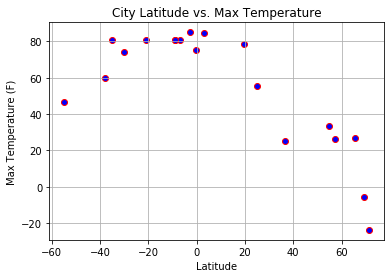

In [29]:
x_values = weather_df['Lat']
y_values = weather_df['Max Temp']
plt.scatter(x_values, y_values, marker='o', facecolors='blue', edgecolors="red")
plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("output_data/lat vs temp plot.png")
plt.show()

#### Latitude vs. Humidity Plot

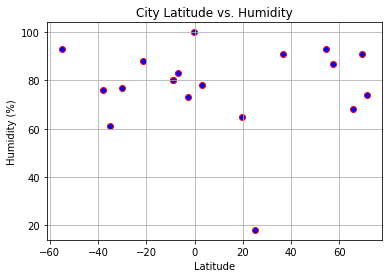

In [30]:
plt.scatter(weather_df['Lat'], weather_df['Humidity'], marker='o',facecolors='blue', edgecolors="red")
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("output_data/lat vs humidity plot.png")
plt.show()

#### Latitude vs. Cloudiness Plot

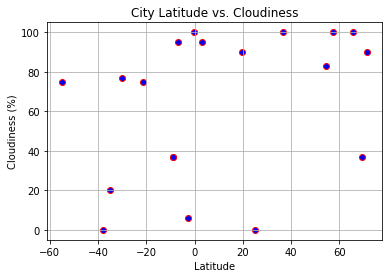

In [31]:
plt.scatter(weather_df['Lat'], weather_df['Cloudiness'], marker='o',facecolors='blue', edgecolors="red")

plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("output_data/lat vs cloudiness plot.png")
plt.show()

#### Latitude vs. Wind Speed Plot

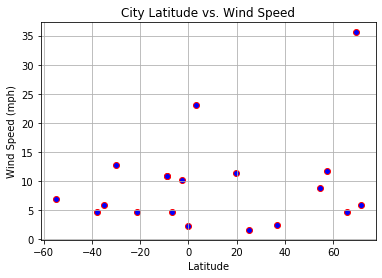

In [32]:
plt.scatter(weather_df['Lat'], weather_df['Wind Speed'], marker='o',facecolors='blue', edgecolors="red")

plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("output_data/lat vs wind speed plot.png")
plt.show()

## Linear Regression

In [33]:
# OPTIONAL: Create a function to create Linear Regression plots

In [34]:
# Create Northern and Southern Hemisphere DataFrames
weather_df['Hemisphere'] = np.where(weather_df['Lat'] >= 0,'Nothern Hemisphere', 'Southern Hemisphere')
weather_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed,Hemisphere
0,taloqan,100,AF,1580185041,91,36.74,69.53,25.30,2.35,Nothern Hemisphere
1,butaritari,95,KI,1580185041,78,3.07,172.79,84.47,23.11,Nothern Hemisphere
3,teguldet,100,RU,1580185041,87,57.31,88.17,26.20,11.77,Nothern Hemisphere
4,karasjok,37,NO,1580185041,91,69.47,25.51,-5.80,35.57,Nothern Hemisphere
5,ushuaia,75,AR,1580184794,93,-54.8,-68.3,46.40,6.93,Southern Hemisphere
6,umm lajj,0,SA,1580185042,18,25.02,37.27,55.54,1.59,Nothern Hemisphere
7,cabedelo,95,BR,1580185012,83,-6.98,-34.83,80.60,4.7,Southern Hemisphere
8,mazagao,100,BR,1580185042,100,-0.12,-51.29,75.20,2.24,Southern Hemisphere
9,tasiilaq,100,GL,1580185042,68,65.61,-37.64,26.60,4.7,Nothern Hemisphere
10,chernyakhovsk,83,RU,1580185042,93,54.63,21.82,33.48,8.84,Nothern Hemisphere


In [35]:
nothern_df = weather_df.loc[weather_df['Hemisphere'] == 'Nothern Hemisphere']
nothern_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed,Hemisphere
0,taloqan,100,AF,1580185041,91,36.74,69.53,25.30,2.35,Nothern Hemisphere
1,butaritari,95,KI,1580185041,78,3.07,172.79,84.47,23.11,Nothern Hemisphere
3,teguldet,100,RU,1580185041,87,57.31,88.17,26.20,11.77,Nothern Hemisphere
4,karasjok,37,NO,1580185041,91,69.47,25.51,-5.80,35.57,Nothern Hemisphere
6,umm lajj,0,SA,1580185042,18,25.02,37.27,55.54,1.59,Nothern Hemisphere
9,tasiilaq,100,GL,1580185042,68,65.61,-37.64,26.60,4.7,Nothern Hemisphere
10,chernyakhovsk,83,RU,1580185042,93,54.63,21.82,33.48,8.84,Nothern Hemisphere
12,hilo,90,US,1580184847,65,19.73,-155.09,78.80,11.41,Nothern Hemisphere
14,barrow,90,US,1580185043,74,71.29,-156.79,-23.80,5.82,Nothern Hemisphere


In [36]:
southern_df = weather_df.loc[weather_df['Hemisphere'] == 'Southern Hemisphere']
southern_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed,Hemisphere
5,ushuaia,75,AR,1580184794,93,-54.8,-68.3,46.40,6.93,Southern Hemisphere
7,cabedelo,95,BR,1580185012,83,-6.98,-34.83,80.60,4.7,Southern Hemisphere
8,mazagao,100,BR,1580185042,100,-0.12,-51.29,75.20,2.24,Southern Hemisphere
11,maragogi,37,BR,1580185042,80,-9.01,-35.22,80.78,10.8,Southern Hemisphere
13,vaini,75,TO,1580185043,88,-21.2,-175.2,80.60,4.7,Southern Hemisphere
15,mar del plata,0,AR,1580184857,76,-38,-57.56,60.01,4.7,Southern Hemisphere
16,sao jose da coroa grande,37,BR,1580185043,80,-8.9,-35.15,80.78,10.8,Southern Hemisphere
17,albany,20,AU,1580185043,61,-35.02,117.89,80.60,5.82,Southern Hemisphere
18,kavieng,6,PG,1580185043,73,-2.57,150.8,85.06,10.16,Southern Hemisphere
19,cidreira,77,BR,1580184939,77,-30.18,-50.21,74.30,12.68,Southern Hemisphere


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.9124567643703538


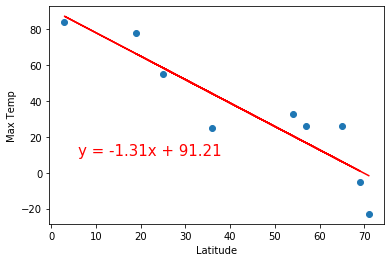

In [105]:
nothern_df['Lat'].astype(int)
nothern_df['Max Temp'].astype(int)

x_values = nothern_df['Lat']
y_values = nothern_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-squared is: {rvalue}")
plt.savefig('output_data/Linear Regression/Nothern Hem_Max Temp vs Lat.png')
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7906496577288087


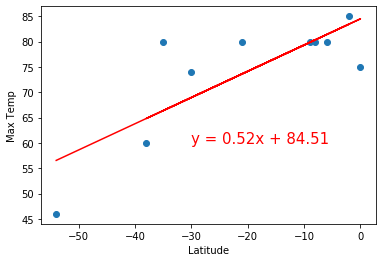

In [104]:
southern_df['Lat'].astype(int)
southern_df['Max Temp'].astype(int)

x_values = southern_df['Lat']
y_values = southern_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,60),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-squared is: {rvalue}")
plt.savefig('output_data/Linear Regression/Southern Hem_Max Temp vs Lat.png')
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.35962486394300075


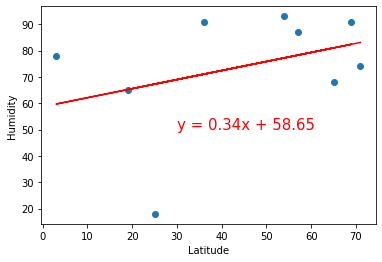

In [103]:
nothern_df['Lat'].astype(int)
nothern_df['Humidity'].astype(int)

x_values = nothern_df['Lat']
y_values = nothern_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(30,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-squared is: {rvalue}")
plt.savefig('output_data/Linear Regression/Nothern Hem_Humidity(%) vs Lat.png')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.1436320424441816


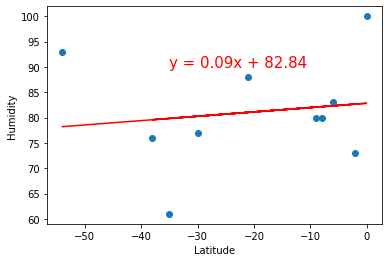

In [102]:
southern_df['Humidity'].astype(int)

x_values = southern_df['Lat']
y_values = southern_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-35,90),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-squared is: {rvalue}")
plt.savefig('output_data/Linear Regression/Southern Hem_Humidity(%) vs Lat.png')
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.05953229517621464


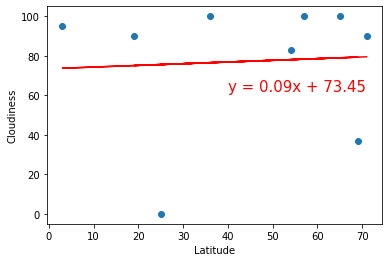

In [98]:
nothern_df['Cloudiness'].astype(int)

x_values = nothern_df['Lat']
y_values = nothern_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,62),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-squared is: {rvalue}")
plt.savefig('output_data/Linear Regression/Nothern Hem_Cloudiness(%) vs Lat.png')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.12463570193710145


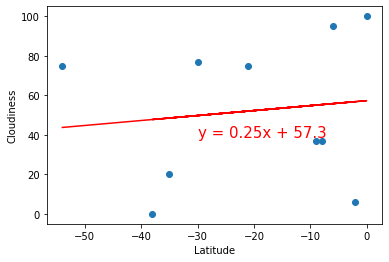

In [99]:
x_values = southern_df['Lat']
y_values = southern_df['Cloudiness'].astype(int)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,39),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-squared is: {rvalue}")
plt.savefig('output_data/Linear Regression/Southern Hem_Cloudiness (%) vs Lat.png')
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.01404204199320443


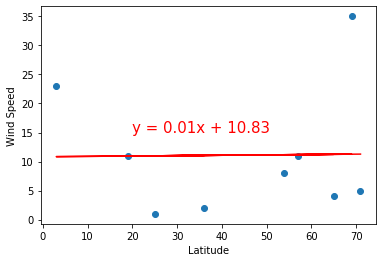

In [100]:
x_values = nothern_df['Lat']
y_values = nothern_df['Wind Speed'].astype(int)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,15),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-squared is: {rvalue}")
plt.savefig('output_data/Linear Regression/Nothern Hem_Wind Speed (mph) vs Lat.png')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.08988044142255551


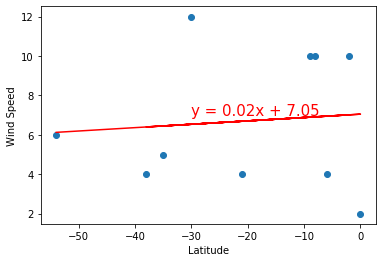

In [101]:
x_values = southern_df['Lat']
y_values = southern_df['Wind Speed'].astype(int)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,7),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-squared is: {rvalue}")
plt.savefig('output_data/Linear Regression/Southern Hem_Wind Speed (mph) vs Lat.png')
plt.show()